# Explorary Data Analysis and Feature Engineering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In general, there are Univariate analysis, Bivariate analysis, and Multivariate analysis for EDA

## 1 EDA

## 1.1 Univariate Analysis

In [2]:
data = pd.read_csv("./WineQT.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### (1) Bar plot (Check distribution of categorical feature)

In [5]:
quality_counts = data['quality'].value_counts()

In [6]:
quality_counts

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

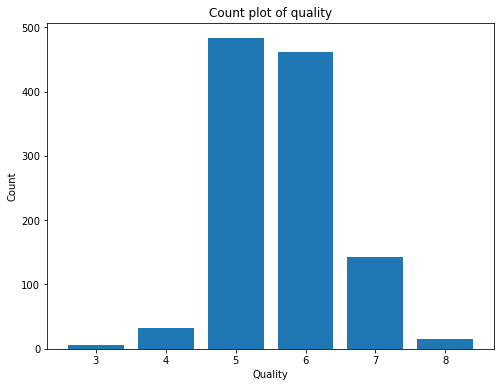

In [10]:
plt.figure(figsize=(8,6))
plt.bar(quality_counts.index, quality_counts)
plt.title("Count plot of quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

### (2) Kernel density plot
(histogram. Study numerical features)

In [12]:
numerical_columns = [col for col in data.columns if data[col].dtypes!='object']

In [13]:
data['fixed acidity'].skew()

1.0449299563724053

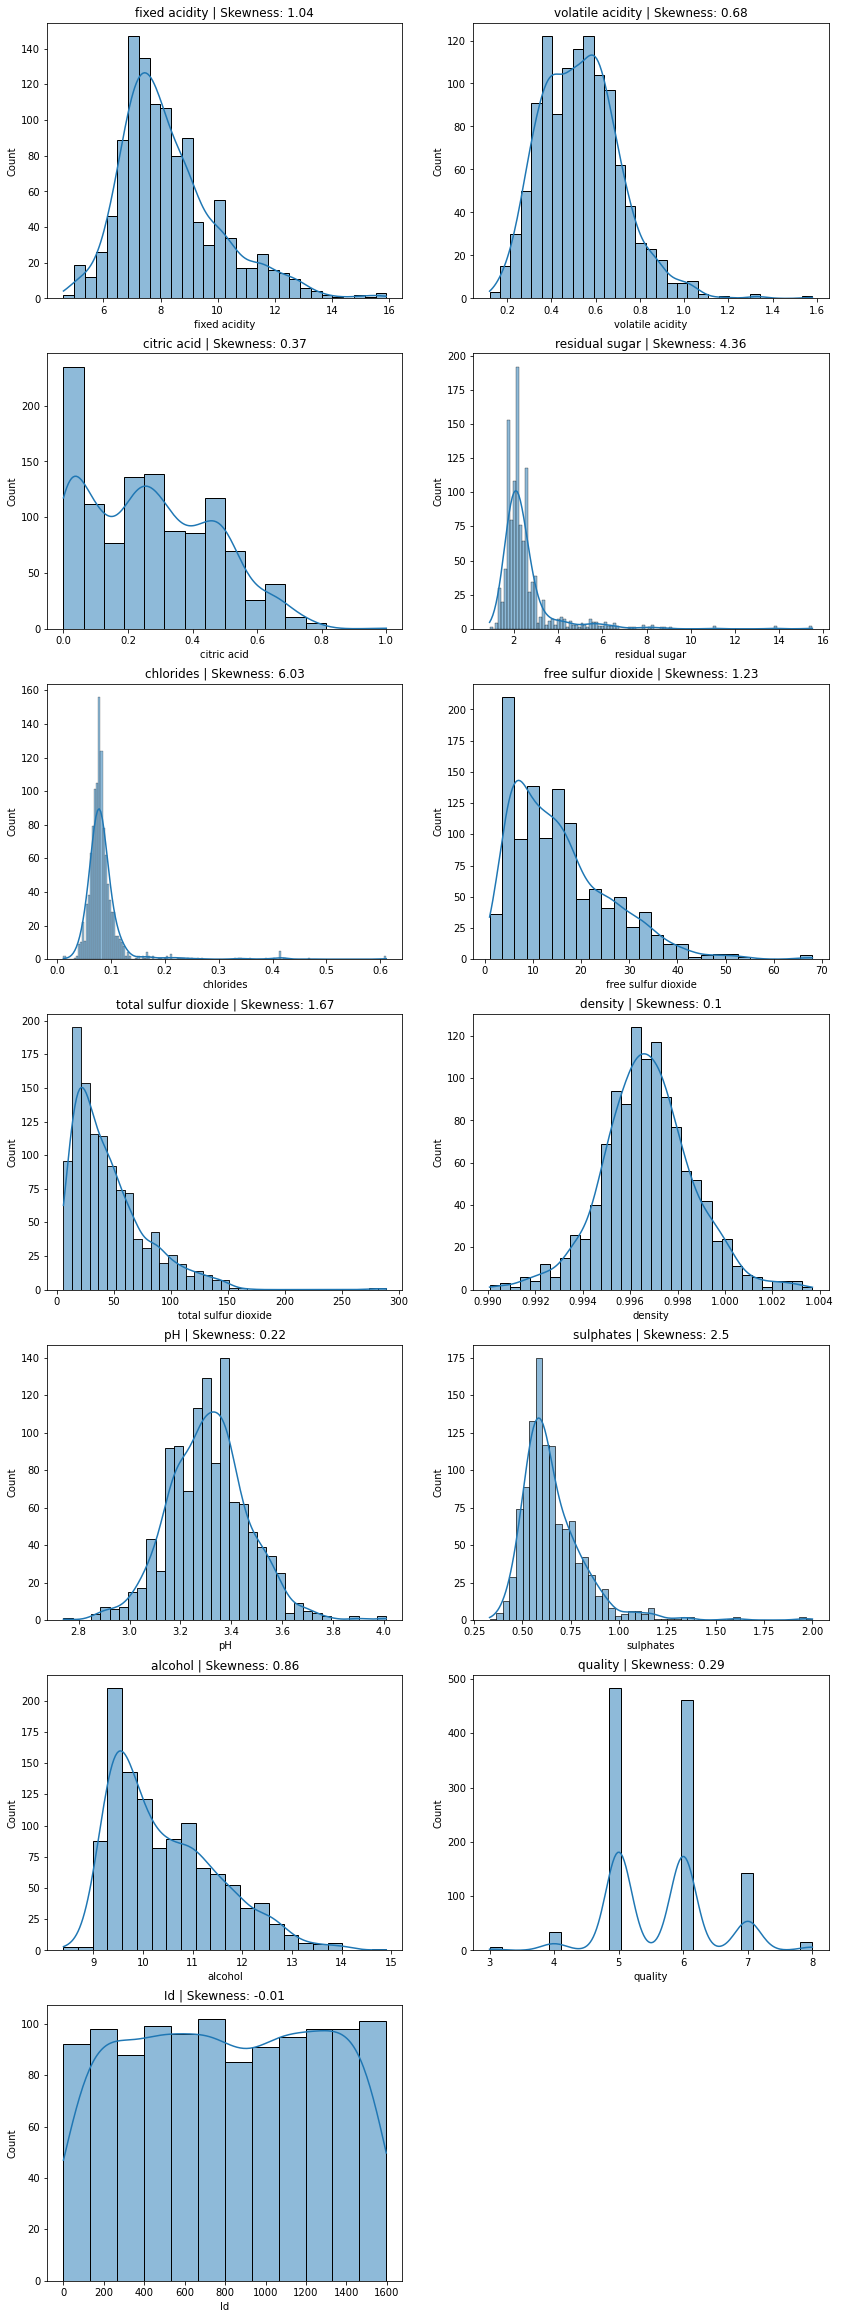

In [16]:
# Between -0.5 and 0.5: The data is considered fairly symmetrical.
# Between -1 and -0.5 or 0.5 and 1: The data is moderately skewed.
# Less than -1 or greater than 1: The data is highly skewed.
plt.figure(figsize=(14, len(numerical_columns)*6))
for idx, feature in enumerate(numerical_columns, 1): #idx start from 1
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

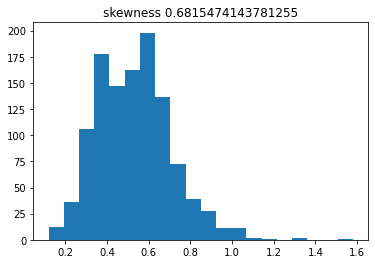

In [19]:
# An easier way to check this is use plt.hist()
plt.hist(data['volatile acidity'].values, bins=20)
plt.title(f"skewness {data['volatile acidity'].skew()}")
plt.show()

In [ ]:
The higher point density in certain areas shows where most of the data points are concentrated.

## 1.2 Bivariate Analysis

In bivariate analysis two variables are analyzed together to identify patterns, dependencies or interactions between them. This method helps in understanding how changes in one variable might affect another

### (1) Pair plot

<Figure size 720x432 with 0 Axes>

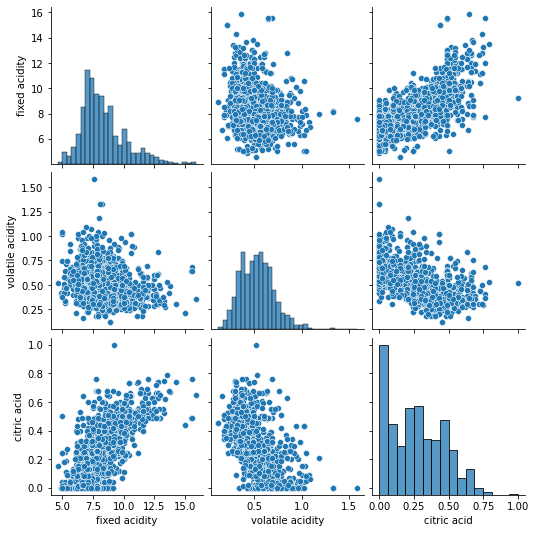

In [28]:
plt.figure(figsize=(10,6))
sns.pairplot(data.iloc[:,:3])
plt.show()

### (2)Swarm plot or violin plot

/Users/ying/Applications/anaconda3/envs/ENV1_site/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ying/Applications/anaconda3/envs/ENV1_site/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


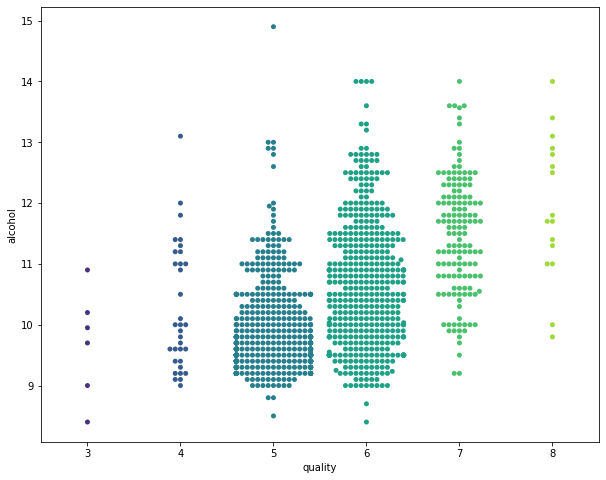

In [29]:
### (3) Swarm plot
plt.figure(figsize=(10,8))
sns.swarmplot(x="quality", y="alcohol", data=data,palette='viridis')
plt.show()

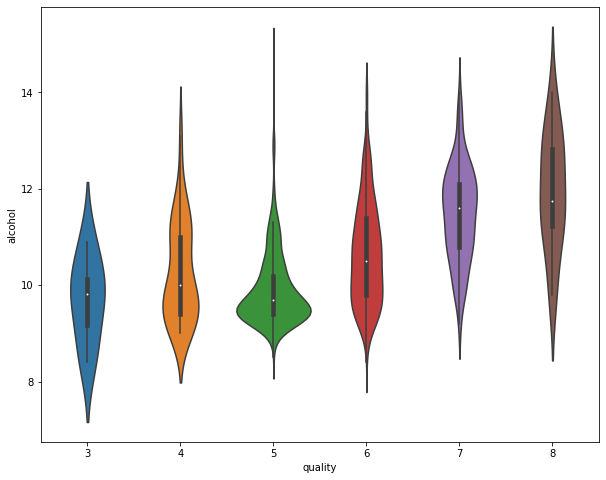

In [30]:
plt.figure(figsize=(10,8))
sns.violinplot(x="quality", y="alcohol", data= data)
plt.show()

### (3) boxplot

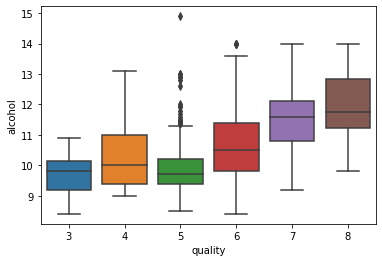

In [32]:
sns.boxplot(x='quality', y='alcohol', data = data) # still using IQR
plt.show()

## 1.3 Multivariate Analysis

### Correlation matrix plot

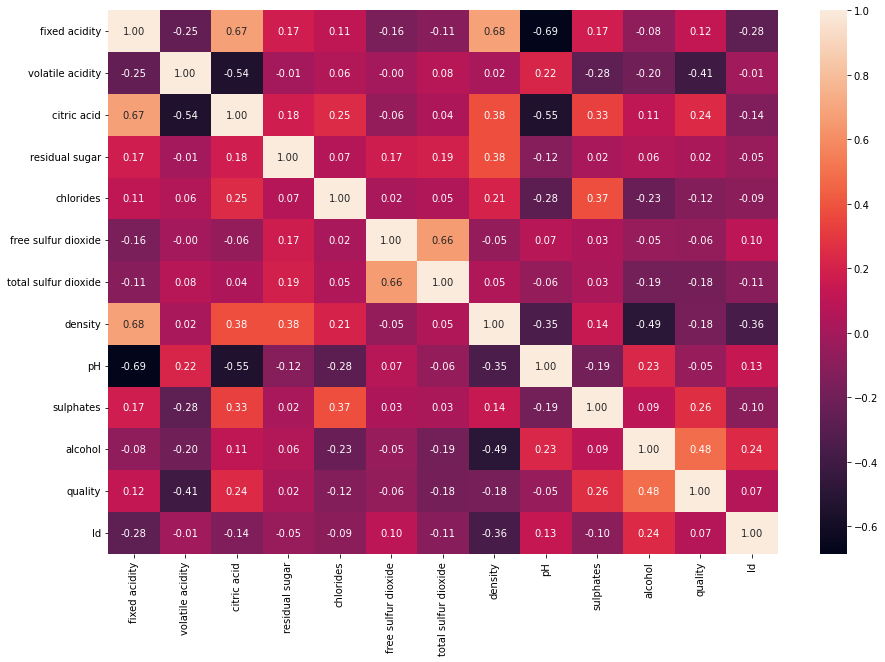

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

# 2 Feature Engineering

### 2.1 Scaling

In general, it includes standardization, min_max scaling, log scaling.
for the scaling, we can do it one by one manually, or setup a sklearn pipeline to do it.

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [38]:
df_standardized = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns = numerical_columns)

In [39]:
df_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-0.815724,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-0.815724,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0.425784,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.726993
